In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading In out.csv

In [2]:
df = pd.read_csv('out.csv',dtype={'time':np.float128,'tdc':np.int32,'adc':np.int32,'pos':np.int32})
df = df[np.logical_and(df['adc'] > 10,df['pos'] > 0)]
df.head()

,time,tdc,adc,pos
0,8.085396e+10,146,213,88
1,8.085396e+10,101,112,89
2,8.085396e+10,112,342,90
3,8.085396e+10,135,308,91
4,8.085396e+10,109,163,92


In [3]:
df.dtypes

time    float128
tdc        int32
adc        int32
pos        int32
dtype: object

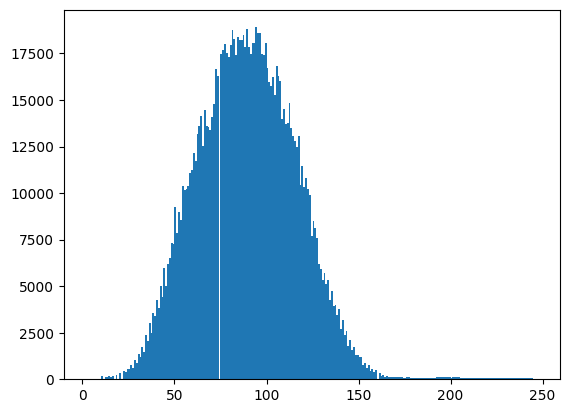

In [4]:
plt.hist(df['pos'],bins=245);

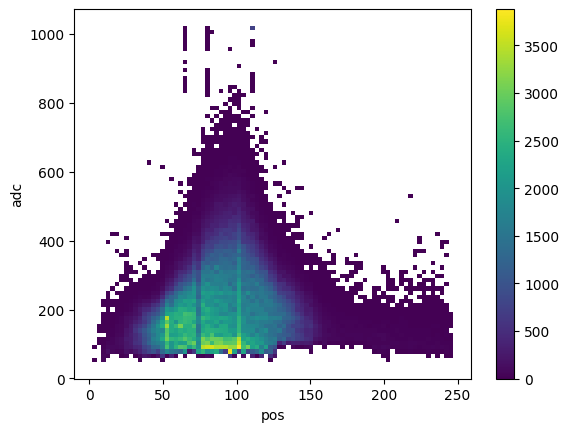

In [5]:
sns.histplot(x=df['pos'],y=df['adc'],bins=80,cmap='viridis',cbar=True);

In [26]:
cluster_dict = {}

buffer = np.zeros((500,2))

cluster_pos = []
cluster_adc = []
cluster_time = []

totaladc = 0
pad73num = 0
pad75num = 0
pad74adc = 0
total73 = 0
total75 = 0
bufferidx = 0
position_ave = 0
time_val_prev = 0
D_time = 0
for i,row in df.iterrows():
    time = row.iloc[0]
    pos = row.iloc[3]
    adc = row.iloc[2]

    if adc < 10:
        continue

    if i > 0:
        D_time = abs(time - time_val_prev)

    if D_time < 200:
        buffer[bufferidx][0] = pos
        buffer[bufferidx][1] = adc

        if pos == 73:
            pad73num += 1
            total73 += adc
        elif pos == 75:
            pad75num += 1
            total75 += adc

        totaladc += adc
        bufferidx += 1

    else:
        if pad75num > 0 and pad73num > 0:
            pad74adc = (total73 + total75) / 2
            totaladc += pad74adc
            position_ave += 74 * (pad74adc / totaladc)

        for j in range(bufferidx):
            position_ave += buffer[j][0] * (buffer[j][1] / totaladc)

        cluster_pos.append(position_ave)
        cluster_adc.append(totaladc)
        cluster_time.append(start_time)

        position_ave = 0
        totaladc = 0
        total73 = 0
        total75 = 0
        pad73num = 0
        pad75num = 0
        bufferidx = 0

        buffer[bufferidx][0] = pos
        buffer[bufferidx][1] = adc
        totaladc += adc
        bufferidx += 1

    start_time = time
    time_val_prev = time


cluster_dict['time'] = cluster_time
cluster_dict['pos'] = cluster_pos
cluster_dict['adc'] = cluster_adc


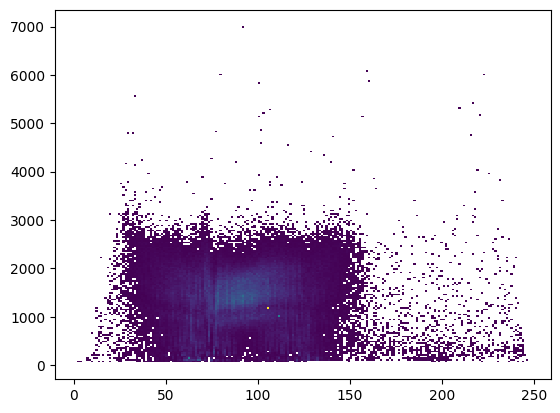

In [27]:
sns.histplot(x=cluster_dict['pos'],y=cluster_dict['adc'],cmap='viridis',bins=200);